# Limpeza de dados e estatística descritiva

Neste desafio, iremos revisar alguns conceitos vistos nas aulas e ver algumas novidades. Os dados originais são do [repositório de dados eleitorais do Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1). 

O CSV disponibilizado é formado pela conjunção de algumas tabelas do arquivo [orgao_partidario.zip](https://cdn.tse.jus.br/estatistica/sead/odsele/orgao_partidario/orgao_partidario.zip), localizado no menu Partidos > Órgão Partidário.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [84]:
import pandas as pd
import numpy as np

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORDESTE.csv" usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [85]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 12874 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

In [86]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';',na_values='#NULO#')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 11606 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

In [87]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CNPJ_PRESTADOR_CONTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,PI,11452,PAES LANDIM,15377706000144,15,MDB,Movimento Democrático Brasileiro,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,NaN,51030012334,MARIA DO SOCORRO PEREIRA MARQUES,ANELIO IBIAPINO DA ROCHA,NaN,NaN,NaN,-1,NaN,-1,-1,-1,NaN,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,PI,12165,CARIDADE DO PIAUÍ,15805026000184,15,MDB,Movimento Democrático Brasileiro,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,NaN,3565215321,SILVIO ROMERO DA SILVA CARVALHO,SILVIO ROMERO DA SILVA CARVALHO,NaN,NaN,NaN,-1,NaN,-1,-1,-1,NaN,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,PI,12661,SÃO MIGUEL DA BAIXA GRANDE,15786484000113,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,4,Depósito em espécie,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,PI,12661,SÃO MIGUEL DA BAIXA GRANDE,15786484000113,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,PI,12564,WALL FERRAZ,9720051000162,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000


# Filtre apenas os registros que sejam da prestação de contas final


In [88]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Relatório Financeiro', 'Parcial',
       'Regularização da Omissão'], dtype=object)

In [89]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(12874, 48)

In [90]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()

In [91]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido
df_final.shape


(12288, 48)

## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [92]:
# Preencha o nome da coluna abaixo
df_final['CD_CNAE_DOADOR'].value_counts()

-1        6509
 94928    5735
 94308      37
 14126       3
 62023       1
 17311       1
 84116       1
 94995       1
Name: CD_CNAE_DOADOR, dtype: int64

In [93]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados
df_final['CD_CNAE_DOADOR'].value_counts(normalize=True)

-1        0.529704
 94928    0.466715
 94308    0.003011
 14126    0.000244
 62023    0.000081
 17311    0.000081
 84116    0.000081
 94995    0.000081
Name: CD_CNAE_DOADOR, dtype: float64

Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [94]:
# Mais da metade dos registros são de pessoas físicas.
# 46% são de organizações políticas

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [95]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
df_final['TIPO_DOADOR'] = df_final['CD_CNAE_DOADOR']
pd.set_option("display.max_columns", None)
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CNPJ_PRESTADOR_CONTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,PI,11452,PAES LANDIM,15377706000144,15,MDB,Movimento Democrático Brasileiro,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,NaN,51030012334,MARIA DO SOCORRO PEREIRA MARQUES,ANELIO IBIAPINO DA ROCHA,NaN,NaN,NaN,-1,NaN,-1,-1,-1,NaN,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,-1
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,PI,12165,CARIDADE DO PIAUÍ,15805026000184,15,MDB,Movimento Democrático Brasileiro,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,NaN,3565215321,SILVIO ROMERO DA SILVA CARVALHO,SILVIO ROMERO DA SILVA CARVALHO,NaN,NaN,NaN,-1,NaN,-1,-1,-1,NaN,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,-1
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,PI,12661,SÃO MIGUEL DA BAIXA GRANDE,15786484000113,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,4,Depósito em espécie,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,94928
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,PI,12661,SÃO MIGUEL DA BAIXA GRANDE,15786484000113,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,94928
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,PI,12564,WALL FERRAZ,9720051000162,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,94928


## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [96]:
df_final['TIPO_DOADOR'] = np.where(df_final['TIPO_DOADOR']== -1, 'fisica', 'juridica')
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CNPJ_PRESTADOR_CONTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,PI,11452,PAES LANDIM,15377706000144,15,MDB,Movimento Democrático Brasileiro,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,NaN,51030012334,MARIA DO SOCORRO PEREIRA MARQUES,ANELIO IBIAPINO DA ROCHA,NaN,NaN,NaN,-1,NaN,-1,-1,-1,NaN,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,fisica
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,PI,12165,CARIDADE DO PIAUÍ,15805026000184,15,MDB,Movimento Democrático Brasileiro,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,NaN,3565215321,SILVIO ROMERO DA SILVA CARVALHO,SILVIO ROMERO DA SILVA CARVALHO,NaN,NaN,NaN,-1,NaN,-1,-1,-1,NaN,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,fisica
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,PI,12661,SÃO MIGUEL DA BAIXA GRANDE,15786484000113,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,4,Depósito em espécie,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,juridica
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,PI,12661,SÃO MIGUEL DA BAIXA GRANDE,15786484000113,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,juridica
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,PI,12564,WALL FERRAZ,9720051000162,40,PSB,Partido Socialista Brasileiro,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,3831447000109,Direção Estadual/Distrital,PARTIDO SOCIALISTA BRASILEIRO,F,Federal (Estadual/Distrital),PI,-1,NaN,-1,-1,-1,NaN,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,juridica


## Agrupando (group by)

In [97]:
# Preencha abaixo primeiro uma lista com as 3 colunas que precisamos utilizar para responder à pergunta. E depois o nome das 2 colunas que precisamos agrupar.

colunas_desejadas = ['TP_PRESTACAO_CONTAS', 'VR_RECEITA', 'TIPO_DOADOR', 'SG_PARTIDO', 'SG_UF']
microdados = df_final.filter(items=colunas_desejadas)

microdados[['SG_UF', 'TIPO_DOADOR', 'VR_RECEITA']].groupby(['SG_UF', 'TIPO_DOADOR']).max()


VR_RECEITA
SG_UF TIPO_DOADOR            
AL    fisica            17665
      juridica        3900000
BA    fisica           200000
      juridica       11900000
CE    fisica           200000
      juridica        3900000
MA    fisica           100000
      juridica        3900000
PB    fisica            23000
      juridica        2169395
PE    fisica           150000
      juridica        4998000
PI    fisica            23708
      juridica        3900000
RN    fisica            25000
      juridica        3900000
SE    fisica            31000
      juridica        4000000

In [98]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima



## Qual o total de doações recebidas por partido?

In [99]:
microdados[['SG_PARTIDO', 'VR_RECEITA']].groupby(['SG_PARTIDO']).max().sort_values(by='VR_RECEITA', ascending=False)

,VR_RECEITA
SG_PARTIDO,
PSD,11900000
PSL,4998000
PT,4550000
PSB,4416373
PP,2894400
MDB,2816674
PODE,2440000
SOLIDARIEDADE,1750000
CIDADANIA,1404329


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [100]:
microdados[['SG_PARTIDO', 'VR_RECEITA']].groupby(['SG_PARTIDO']).max().sort_values(by='VR_RECEITA', ascending=False).head(10)

,VR_RECEITA
SG_PARTIDO,
PSD,11900000
PSL,4998000
PT,4550000
PSB,4416373
PP,2894400
MDB,2816674
PODE,2440000
SOLIDARIEDADE,1750000
CIDADANIA,1404329


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

<AxesSubplot:ylabel='SG_PARTIDO'>

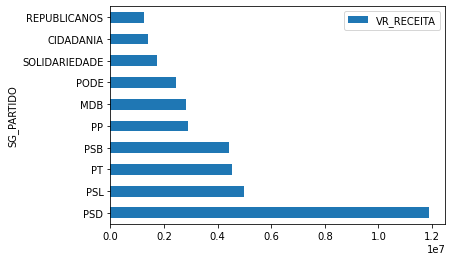

In [101]:
microdados.groupby(['SG_PARTIDO']).max().sort_values(by='VR_RECEITA', ascending=False).head(10).plot(kind='barh')

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

In [102]:
colunas_novas_desejadas = ['TP_PRESTACAO_CONTAS', 'VR_RECEITA', 'TIPO_DOADOR']
novos_microdados = df_final.filter(items=colunas_novas_desejadas)

novos_microdados.groupby(['TIPO_DOADOR']).median()

,VR_RECEITA
TIPO_DOADOR,
fisica,600.0
juridica,1500.0


# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.